In [1]:
import pandas
import seaborn
import matplotlib.pyplot as plt
import glob
import order_independent_llm

In [2]:
rc_params = {
    "figure.figsize": [9, 5],
    "axes.grid": True,
    "axes.grid.axis": "y",
    "axes.grid.which": "major",
    "axes.spines.left": False,
    "axes.spines.bottom": True,
    "axes.spines.top": False,
    "axes.spines.right": False,
    "axes.labelsize": 20,
    "axes.titlesize": 20,
    "xtick.labelsize": 14,
    "ytick.labelsize": 14,
    "xtick.top": False,
    "xtick.bottom": False,
    "ytick.left": False,
    "ytick.right": False,
    "legend.fancybox": False,
    "legend.shadow": False,
    "legend.frameon": False,
    "legend.fontsize": 12,
    "legend.title_fontsize": 14,
    "legend.markerscale": 2,
    "legend.framealpha": 0.5,
    "errorbar.capsize": 10,
    "pdf.fonttype": 42,
    "ps.fonttype": 42,
    #'font.sans-serif': ['Helvetica'], #Requires Helvetica installed
}

plt.rcParams.update(rc_params)

def multi_savefig(
    save_name, dir_name="images", dpi=300, save_types=("pdf", "png", "svg")
):
    os.makedirs(dir_name, exist_ok=True)
    for sType in save_types:
        dName = os.path.join(dir_name, sType)
        os.makedirs(dName, exist_ok=True)

        fname = f"{save_name}.{sType}"

        plt.savefig(
            os.path.join(dName, fname),
            format=sType,
            dpi=dpi,
            transparent=True,
            bbox_inches="tight",
        )


In [16]:
targets = glob.glob("../results/csqa_split/*/*.jsonl")
df_csqa = pandas.concat([order_independent_llm.load_to_dataframe(t,fail_on_empty=False) for t in targets])

In [17]:
targets = glob.glob("../results/mmlu_split/*/*.jsonl")
df_mmlu = pandas.concat([order_independent_llm.load_to_dataframe(t,fail_on_empty=False) for t in targets])

In [18]:
df_piv_c = df_csqa[['model','is_correct_answer','response_type']].groupby(['model','response_type']).count().reset_index().pivot(
    index = 'model',
    columns='response_type',
    values='is_correct_answer'
)[['normal', 'order_independent', 'normal_reversed', 'only_parallel_attention',
       'only_parallel_attention_reversed', 'only_parallel_position',
       'only_parallel_position_reversed']]
df_piv_c

response_type,normal,order_independent,normal_reversed,only_parallel_attention,only_parallel_attention_reversed,only_parallel_position,only_parallel_position_reversed
model,,,,,,,
WizardLM/WizardLM-7B-V1.0,500,500,500,500,500,500,500
gpt2,4000,4000,4000,4000,4000,4000,4000
meta-llama/Llama-2-13b-chat-hf,500,500,500,500,500,500,500
meta-llama/Llama-2-13b-hf,500,500,500,500,500,500,500
meta-llama/Llama-2-7b-chat-hf,1500,1500,1500,1500,1500,1500,1500
meta-llama/Llama-2-7b-hf,1000,1000,1000,1000,1000,1000,1000


In [19]:
df_piv_c = df_mmlu[['model','is_correct_answer','response_type']].groupby(['model','response_type']).count().reset_index().pivot(
    index = 'model',
    columns='response_type',
    values='is_correct_answer'
)[['normal', 'order_independent', 'normal_reversed', 'only_parallel_attention',
       'only_parallel_attention_reversed', 'only_parallel_position',
       'only_parallel_position_reversed']]
df_piv_c

response_type,normal,order_independent,normal_reversed,only_parallel_attention,only_parallel_attention_reversed,only_parallel_position,only_parallel_position_reversed
model,,,,,,,
WizardLM/WizardLM-7B-V1.0,235,235,235,235,235,235,235
gpt2,1747,1747,1747,1747,1747,1747,1747
meta-llama/Llama-2-13b-chat-hf,100,100,100,100,100,100,100
meta-llama/Llama-2-13b-hf,235,235,235,235,235,235,235
meta-llama/Llama-2-7b-chat-hf,487,487,487,487,487,487,487
meta-llama/Llama-2-7b-hf,487,487,487,487,487,487,487


In [43]:
df_piv = df_mmlu[
    #(df_mmlu['model'] == 'meta-llama/Llama-2-7b-chat-hf')& 
    df_mmlu['response_type'].isin(['normal','normal_reversed', 'order_independent'])
][['model','is_correct_answer','response_type']].groupby(['model','response_type']).mean().reset_index().pivot(
    index = 'model',
    columns='response_type',
    values='is_correct_answer'
)
df_piv['var'] = (df_piv['normal'] -df_piv['normal_reversed']).abs()
df_piv['var_oid'] = (df_piv['var'] -df_piv['order_independent']).abs()

In [44]:
df_piv

response_type,normal,normal_reversed,order_independent,var,var_oid
model,,,,,
WizardLM/WizardLM-7B-V1.0,0.463830,0.463830,0.455319,0.000000,0.455319
gpt2,0.244419,0.234688,0.235260,0.009731,0.225529
meta-llama/Llama-2-13b-chat-hf,0.180000,0.230000,0.250000,0.050000,0.200000
meta-llama/Llama-2-13b-hf,0.229787,0.251064,0.246809,0.021277,0.225532
meta-llama/Llama-2-7b-chat-hf,0.305955,0.295688,0.318275,0.010267,0.308008
meta-llama/Llama-2-7b-hf,0.316222,0.262834,0.289528,0.053388,0.236140


In [23]:
df_mmlu[

,response_type,model,order_independent_output,pad_attention,text_output,is_correct_answer,correct_answer_prob,edit_position,edit_attention,meta_label,meta_incorrect_answers,prompt,file_name
0,normal,meta-llama/Llama-2-7b-chat-hf,False,False,2 1. Find the degree of the extension Q(sqrt(2...,False,2.600288e-01,False,False,4,"[0, 2, 6]",Find the degree for the given field extension ...,meta-llama_Llama-2-7b-chat-hf-100-abstract_alg...
1,normal_reversed,meta-llama/Llama-2-7b-chat-hf,False,False,2\n\nI'm not sure how to approach this problem...,False,2.135079e-01,False,False,4,"[0, 2, 6]",Find the degree for the given field extension ...,meta-llama_Llama-2-7b-chat-hf-100-abstract_alg...
2,order_independent,meta-llama/Llama-2-7b-chat-hf,True,False,"2\n\nLet $L = Q(sqrt(2), sqrt(3), sqrt(18))$. ...",False,2.556013e-01,True,True,4,"[0, 2, 6]",Find the degree for the given field extension ...,meta-llama_Llama-2-7b-chat-hf-100-abstract_alg...
3,only_parallel_attention,meta-llama/Llama-2-7b-chat-hf,True,False,"The degree of the field extension Q(sqrt(2), ...",True,3.525151e-01,False,True,4,"[0, 2, 6]",Find the degree for the given field extension ...,meta-llama_Llama-2-7b-chat-hf-100-abstract_alg...
4,only_parallel_attention_reversed,meta-llama/Llama-2-7b-chat-hf,True,False,2\n\nLet $L/Q$ be a field extension with $L = ...,False,2.859661e-01,False,True,4,"[0, 2, 6]",Find the degree for the given field extension ...,meta-llama_Llama-2-7b-chat-hf-100-abstract_alg...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
793,order_independent,gpt2,True,False,__________________\n\nAnswer: ________________...,False,8.912934e-08,True,True,"(i), (ii), and (iii) only","[(ii) and (iv) only, (i) and (iii) only, (i), ...",Which of the following statements are true con...,gpt2-100-econometrics_test
794,only_parallel_attention,gpt2,True,False,__________________\n\nAnswer: ________________...,False,1.231126e-07,False,True,"(i), (ii), and (iii) only","[(ii) and (iv) only, (i) and (iii) only, (i), ...",Which of the following statements are true con...,gpt2-100-econometrics_test
795,only_parallel_attention_reversed,gpt2,True,False,__________________\n\nAnswer: ________________...,False,1.345577e-07,False,True,"(i), (ii), and (iii) only","[(ii) and (iv) only, (i) and (iii) only, (i), ...",Which of the following statements are true con...,gpt2-100-econometrics_test
796,only_parallel_position,gpt2,True,False,__________________\n\nAnswer: ________________...,False,9.656753e-08,True,False,"(i), (ii), and (iii) only","[(ii) and (iv) only, (i) and (iii) only, (i), ...",Which of the following statements are true con...,gpt2-100-econometrics_test


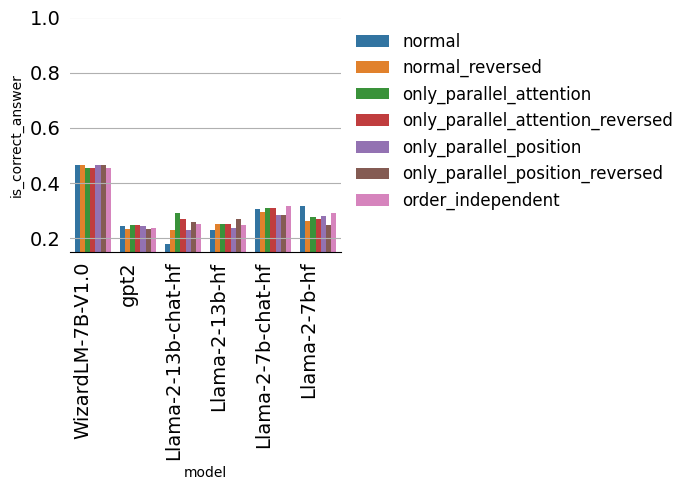

In [21]:
fig, ax  = plt.subplots(figsize = (7,5))
seaborn.barplot(
    hue = 'response_type',
    x = 'model',
    y ='is_correct_answer',
    data = df_mmlu[['model','is_correct_answer','response_type']].groupby(['model','response_type']).mean().reset_index(),
    ax = ax
)
ax.set_ylim([.15,1])
ax.set_xticklabels([l._text.split('/')[-1] for l in ax.get_xticklabels()], rotation=90, ha='right')
ax.legend(bbox_to_anchor=(1,1),loc = 'upper left')
fig.tight_layout()

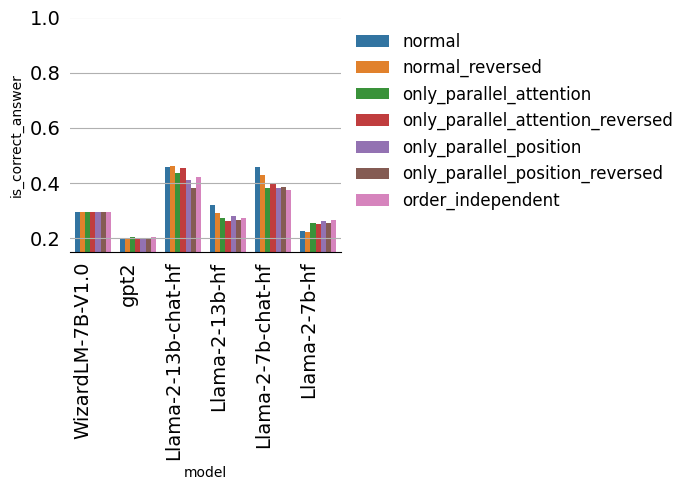

In [22]:
fig, ax  = plt.subplots(figsize = (7,5))
seaborn.barplot(
    hue = 'response_type',
    x = 'model',
    y ='is_correct_answer',
    data = df_csqa[['model','is_correct_answer','response_type']].groupby(['model','response_type']).mean().reset_index(),
    ax = ax
)
ax.set_ylim([.15,1])
ax.set_xticklabels([l._text.split('/')[-1] for l in ax.get_xticklabels()], rotation=90, ha='right')
ax.legend(bbox_to_anchor=(1,1),loc = 'upper left')
fig.tight_layout()
